In [75]:
#find webpage with episode descriptions of Ted Lasso 
#scrape the page to pull out individual desciptoins
#compute polarity score of each episode, see how it changed over time

In [76]:
#start with some web scraping practice, before real
from urllib.request import urlopen
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt
import ssl

ssl._create_default_https_context = ssl._create_stdlib_context

In [77]:
#scrape tiny fake webage
html = urlopen("https://www.khoury.northeastern.edu/home/laney/simple.html")
bs = BeautifulSoup(html.read(),"html.parser")

In [78]:
bs.title

<title>Laney's Fake Web page</title>

In [79]:
imgs= bs.findAll("img")
imgs

[<img src="https://i0.wp.com/news.northeastern.edu/wp-content/uploads/2022/07/072822_AS_Sarge_001.jpg?w=1400&amp;ssl=1" width="100"/>,
 <img alt="Cooper, Northeastern's community dog" height="100" src="https://i0.wp.com/news.northeastern.edu/wp-content/uploads/2021/06/062421_MM_cooper_039.jpg?w=1400&amp;ssl=1" width="100"/>,
 <img alt="Paws, of the Howlin Huskies" src="https://huntnewsnu.com/wp-content/uploads/2014/05/1565016743_c8982ca545_z.jpg" width="100"/>]

In [80]:
paragraphs = bs.findAll("p")
for p in paragraphs:
    print(p.get_text())

Hello I am a paragraph of some content. Content content content.
I am the second paragraph, with more information. click here.
More content. click here also.
	


In [81]:
tb = TextBlob("nice weather today!")
tb.sentiment.polarity

0.75

In [82]:
tb = TextBlob("nice weather today")
tb.sentiment.polarity

0.6

In [83]:
tb = TextBlob("not very nice weather today")
tb.sentiment.polarity

-0.23076923076923073

In [84]:
#does it pay attention to phrases and not just indivudal words
tb = TextBlob("it could have been worse")
tb.sentiment.polarity

-0.4

In [85]:
tb = TextBlob("that person has mad rizz")
tb.sentiment.polarity

-0.625

In [86]:
tb = TextBlob("that person has W rizz")
tb.sentiment.polarity

0.0

In [87]:
tb = TextBlob("wtf")
tb.sentiment.polarity

-0.5

In [88]:
tb = TextBlob("so stupid! I'm on the T now")
tb.sentiment.polarity

-0.9999999999999999

In [89]:
tb = TextBlob("I know that sounds crazy!")
tb.sentiment.polarity

-0.75

In [90]:
tb =TextBlob("lol")
tb.sentiment.polarity

0.8

In [91]:
tb = TextBlob("that so cool! so happy!")
tb.sentiment.polarity

0.71875

In [92]:
tb = TextBlob("wonderful ")
tb.sentiment.polarity

1.0

In [93]:
#ted lasso
html = urlopen("https://en.wikipedia.org/wiki/Ted_Lasso")
bs = BeautifulSoup(html.read(),"html.parser")


In [94]:
#descriptoin in <td class = "description"...>
#use finallAll tag = id, class = description

descriptions = bs.findAll("td",{"class":"description"})
for d in descriptions:
    print(d.get_text(),"\n")



Recently divorced Rebecca Welton becomes the new owner of the fictional AFC Richmond, a struggling club in the Premier League. To seek revenge on her ex-husband who cheated on her multiple times and was never blamed for it, Rebecca resolves to hire the most incompetent coach she can find to ruin the club, as it was the only thing her ex ever loved. To this end she hires Ted Lasso, a college football coach from Wichita, Kansas. Ted has recently coached an NCAA Division II football team to a title, but knows nothing about soccer. Arriving in Richmond with his assistant, Coach Beard, he tries to connect with his new teammates with his positive, folksy charm, but the club hates him anyway. He is thought of as a rube, but it soon becomes clear he is smarter than he looks. In his apartment at night, he speaks to his son and wife on the phone and hints that he took the job because his wife had wanted "space". 


On his first day at AFC Richmond, Ted attempts to win over the players and manag

In [95]:
len(descriptions)

34

In [96]:
pols = []
for d in descriptions:
    tb= TextBlob(d.get_text())
    pols.append(tb.sentiment.polarity)
pols

[0.10384615384615385,
 0.11217948717948717,
 -0.044065656565656565,
 0.052777777777777785,
 0.021071428571428585,
 0.21382189239332097,
 -0.08593750000000001,
 0.06458333333333334,
 0.08672438672438673,
 0.1138888888888889,
 0.20606060606060606,
 -0.08863636363636362,
 -0.04166666666666668,
 -0.16785714285714284,
 0.17045454545454544,
 0.022222222222222216,
 0.09289772727272727,
 -0.12542735042735043,
 -0.11538461538461539,
 -0.020833333333333332,
 0.1459505772005772,
 0.19642857142857142,
 0.04852272727272726,
 -0.10400000000000001,
 0.14545454545454548,
 -0.05277777777777778,
 -0.11153846153846152,
 0.15233585858585857,
 0.10111111111111111,
 0.30238095238095236,
 0.00468749999999999,
 -0.10833333333333334,
 -0.17055555555555557,
 0.08080808080808081]

(-0.4, 0.4)

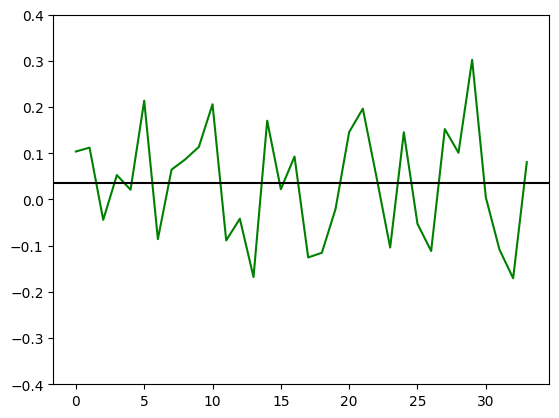

In [100]:

plt.plot(pols,color = "green")
plt.axhline(sum(pols)/len(pols),color = 'Black')
plt.ylim(-.4,.4)
